# Лабораторная работа №7
###Написать собственую реализацию Rejection sampling и metropolis gasting
###Применить для 1-2 функций плотности и построить график сэмплирования точки и линий уровня

In [ ]:
import math
from PIL import Image
from numpy.random import normal, rand
import matplotlib.pyplot as plt
import numpy as np
import random

#Распредления Парето и Рэлея

In [ ]:
def rayleigh(x):
    d = 2
    return (x / (d * d)) * np.exp(-x ** 2 / (2 * d * d))

In [ ]:
def pareto(x):
    m=1
    d=2
    return (d * m**d) / (x**(d+1))

#Rejection Sampling

In [ ]:
def rejection_sampling(N, f, a, b, c):
    X = []
    Y = []
    False_X = []
    False_Y = []
    while len(X) < N:
        x = rand() * (b - a) + a
        y = rand() * c
        
        if y < f(x):
            X.append(x)
            Y.append(y)
        else:
            False_X.append(x)
            False_Y.append(y)
    
    return X, Y, False_X, False_Y

In [ ]:
def RS_show(num_samples, distrib_func, a, b, c):
    xs = np.linspace(a, b, num_samples)
    ys = distrib_func(xs)

    X,Y,False_X,False_Y = rejection_sampling(num_samples, distrib_func, a, b, c)
    
    plt.hist(X, 50, density=True,color="green")
    plt.plot(xs, ys,color = "red")
    plt.scatter(X, Y, s=1,color = "blue")
    plt.scatter(False_X, False_Y, s=1, color = "red")
    
    plt.xlabel("x")
    plt.ylabel("y")
    
    paddings_factor = 0.05
    x_width = b - a
    y_height = max(np.max(False_Y), np.max(Y))
    
    xlim_shift = x_width * paddings_factor
    ylim_shift = y_height * paddings_factor
    
    plt.xlim(a - xlim_shift , b + xlim_shift)
    plt.ylim(0, np.max(Y))
    
    plt.show()

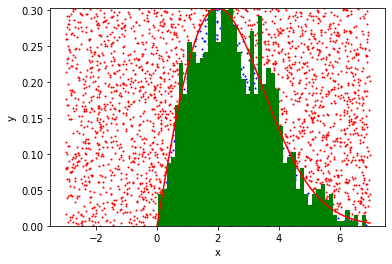

In [ ]:
RS_show(1000, rayleigh, -3, 7, 0.5)

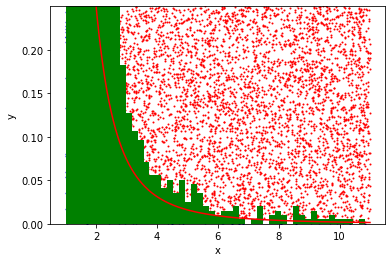

In [ ]:
RS_show(1000, pareto, 1, 11, 0.25)

#Алгоритм Метрополиса — Гастингса

In [16]:
def metropolis_hastings_sampling(N, x0, f):
    X = [x0]
    while len(X) < N:
        x_old = X[-1]
        x_new = normal(x_old)
        a = f(x_new)/f(x_old)
        if rand() < a:
            X.append(x_new)
        else:
            X.append(x_old)
    return X

In [17]:
def MH_show(num_samples, distrib_func, m, a, b, c):
    
    X = metropolis_hastings_sampling(num_samples, m, distrib_func)
    xs = np.linspace(a, b, 100)
    ys = distrib_func(xs)
    plt.plot(xs, ys,color = "red")
    plt.hist(X, 50, density=True,color="green")
    plt.xlabel("x"), plt.ylabel("y"), plt.xlim(a,b), plt.ylim(0, c)
    plt.grid(True)
    plt.show()

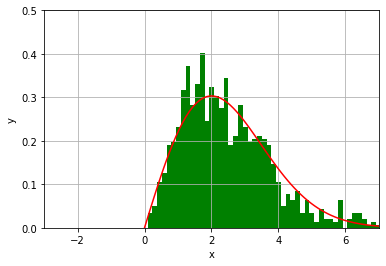

In [18]:
MH_show(1000, rayleigh, 2, -3, 7, 0.5)

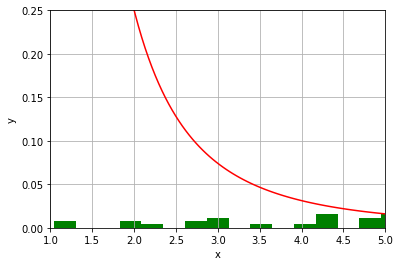

In [22]:
MH_show(1000, pareto, 10, 1, 5, 0.25)